# Direct PSF subtraction flux comparison
Compare fitted and catalog fluxes for all "good" sources.
Optionally, compare pca and psfex decam repo fits on one plot.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)
import numpy as np
import lsst.daf.persistence as dafPersist
import lsst.geom as geom
from astropy.visualization import ZScaleInterval

%run -n -i "subtraction_defs.py"

In [2]:
# PCA repo
REPO = '/data1/gkovacs/DM-27128-repo3/ingested/rerun/pccd2'
butler = dafPersist.Butler(REPO)
dataId={'visit': 419802, 'ccdnum':25}

calexp = butler.get('calexp', dataId=dataId)
srcCat = butler.get('src', dataId=dataId)

In [3]:
# This is the condition R.Lupton used in his example
i_goodSrc = (srcCat["deblend_nChild"] == 0) & (~srcCat["base_SdssCentroid_flag"])
# i_goodSrc = srcCat['calib_psf_used']

-------

### Get the fluxes for the pca psf

In [4]:
fluxes = []
calib = calexp.getPhotoCalib()
for src in srcCat[i_goodSrc]:
    res = getCutoutAndPsf(calexp, src)
    resD = minimizeDiff(res.cutExp, res.psfIm)
    fluxes.append(calib.instFluxToNanojansky(resD.x))
fluxes = np.array(fluxes)

In [5]:
cat2 = srcCat[i_goodSrc]
# _instFlux is automatically appended to column name
# catfluxes = calib.instFluxToNanojansky(cat2,'base_GaussianFlux')[:, 0]
catfluxes = calib.instFluxToNanojansky(cat2,'base_SdssShape')[:, 0]

In [6]:
flt = np.isfinite(catfluxes)

<IPython.core.display.Javascript object>


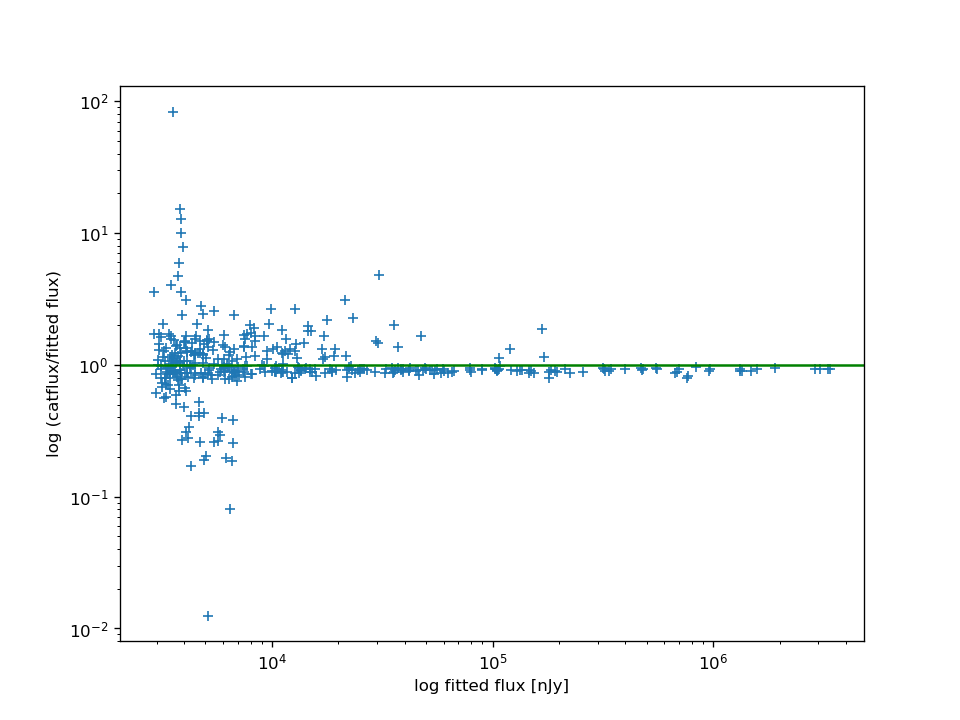

Text(0, 0.5, 'log (catflux/fitted flux)')

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(fluxes[flt], catfluxes[flt] / fluxes[flt], '+', label='pca')
ax.axhline(1, c='green')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('log fitted flux [nJy]')
ax.set_ylabel('log (catflux/fitted flux)')

<IPython.core.display.Javascript object>


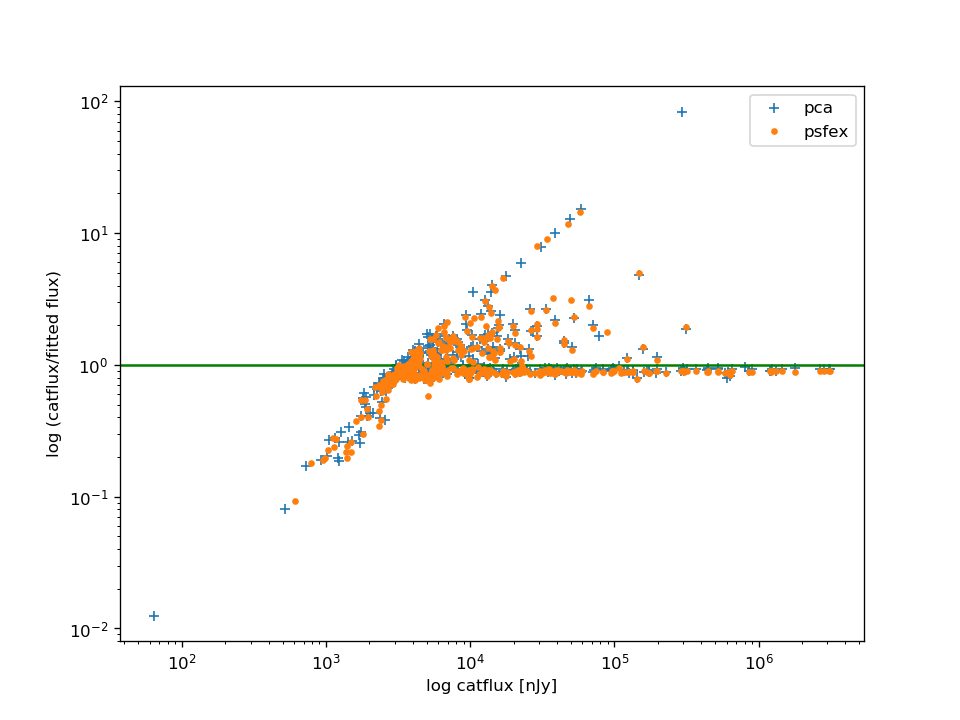

Text(0, 0.5, 'log (catflux/fitted flux)')

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(catfluxes[flt], catfluxes[flt] / fluxes[flt], '+', label='pca')
ax.axhline(1, c='green')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('log catflux [nJy]')
ax.set_ylabel('log (catflux/fitted flux)')

------

### Add psfex to the plot above
Repeat the fit with the psfex repo and plot it onto the same figure

In [9]:
# PSFEX repo
REPO = '/data1/gkovacs/DM-27127-repo/ingested/rerun/pccd_psfex'

In [10]:
butler = dafPersist.Butler(REPO)
dataId={'visit': 419802, 'ccdnum':25}

calexp = butler.get('calexp', dataId=dataId)
srcCat = butler.get('src', dataId=dataId)

#print(srcCat.columns.schema)
print(type(calexp.getPsf()))

<class 'lsst.meas.extensions.psfex.psfexPsf.PsfexPsf'>


In [11]:
i_goodSrc = (srcCat["deblend_nChild"] == 0) & (~srcCat["base_SdssCentroid_flag"])
# i_goodSrc = srcCat['calib_psf_used']

In [12]:
fluxes = []
calib = calexp.getPhotoCalib()
for src in srcCat[i_goodSrc]:
    res = getCutoutAndPsf(calexp, src)
    resD = minimizeDiff(res.cutExp, res.psfIm)
    fluxes.append(calib.instFluxToNanojansky(resD.x))
fluxes = np.array(fluxes)

In [13]:
cat2 = srcCat[i_goodSrc]
# _instFlux is automatically appended to column name
# catfluxes = calib.instFluxToNanojansky(cat2,'base_GaussianFlux')[:, 0]
catfluxes = calib.instFluxToNanojansky(cat2,'base_SdssShape')[:, 0]
flt = np.isfinite(catfluxes)

In [14]:
ax.plot(catfluxes[flt], catfluxes[flt] / fluxes[flt], '.', label='psfex')
ax.legend()